# Will I find a job after college and what will my salary be worth: understanding inflation and unemployment

#### By Anastasiya Borys (Goldman Sachs)

### Content for Today
* [Inflation and Why It Matters](#Inflation-and-Why-It-Matters)
* [Unemployment and Why It Matters](#Unemployment-and-Why-It-Matters)
* [Inflation and Unemployment Relationship](#Unemployment-and-Why-It-Matters)
    * [Phillips Curve](#Phillips-curve)
    * [Federal Reserve and Dual Mandate](#Federal-Reserve-Bank-and-Dual-Mandate)
* [Data Deep Dive](#Data-Deep-Dive)
    * [Visualizing the Relationship](#Visualizing-the-Relationship)
    * [1970s and Stagflation](#1970s-and-Stagflation)
    * [Where we Stand Today](#Given-Historically-Low-Unemployment-Today-Why-Is-Inflation-So-Low?)

## Inflation and Why It Matters

* Inflation is the rate at which the general level of prices for goods and services is rising. Another way to look at inflation is the rate at which the purchasing power of currency is falling.
* This means that if you hold cash under the matress, that cash becomes less valuable over time (i.e. has less purchasing power) but if you own a house for example, inflation may help increase the value of your house. 
* If you have loans, you may not want to see a surprise decline in inflation as it means debts are more burdensome. 
* While Venezuelan-grade inflation is destructive, some inflation in the economy is needed to growth by promoting spending and investing instead of leaving the cash in the matress.
* Some inflation is also useful to central banks because it helps them fight recessions. To spur borrowing, they can cut their policy rates to well below the rate of inflation and inflation needs to be above zero to do that.

Let's take a closer look at inflation by examining two common indices that track inflation: CPI (consumer price index) and PCE (personal consumption expenditure). 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install gs_quant
from gs_quant.data import Dataset
from gs_quant.api.fred.data import FredDataApi

    100% |████████████████████████████████| 665kB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 266kB 2.2MB/s eta 0:00:01
    100% |████████████████████████████████| 276kB 2.0MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 2.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for lmfit ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/1f/93/e9/8d3f759e466f5bbfed3ba1d7dc5b3d4389c469a1ec9a2acaee
  Running setup.py bdist_wheel for asteval ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/1c/53/1b/28d929700c9633b1786a4982e6db564ec8326a8930234dcc19
  Running setup.py bdist_wheel for uncertainties ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d9/d3/0e/5b0b743a8abd50373705427438456da5dc2621891138d7a618
Successfully built lmfit asteval uncertainties
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading vi

In [5]:
# FRED API key, create one here: https://research.stlouisfed.org/docs/api/api_key.html
FRED_API_KEY = '76b1c94ee18a66accd47b0aae0a2fe32'
fred_API = FredDataApi(api_key=FRED_API_KEY)

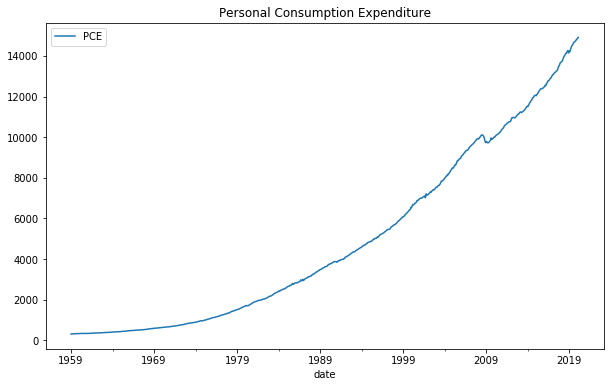

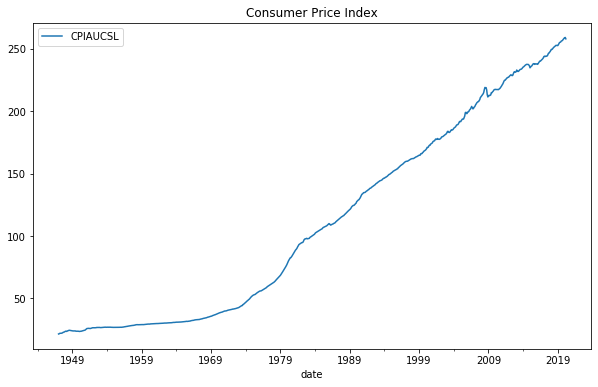

In [6]:
# Pull the personal consumption expenditure data set (https://fred.stlouisfed.org/series/PCE)
PCE = Dataset('PCE', fred_API).get_data()
PCE.plot(figsize=(10, 6), title='Personal Consumption Expenditure')

# Put consumer price index for all urban consumers (https://fred.stlouisfed.org/series/CPIAUCSL)
CPI = Dataset('CPIAUCSL', fred_API).get_data()
CPI.plot(figsize=(10, 6), title='Consumer Price Index')

### Unemployment and Why It Matters
* Unemployment happens when workers who want to work are unable to find jobs. High unemployment may translate into lower economic output and lower levels of economic growth.
* High rates of unemployment are a signal of economic distress. Extremely low rates of unemployment may signal an overheated economy.

To look at unemployment, we will look at number of unemployed at percentage of the labor force.

,UNRATE
date,
2019-12-01,3.5
2020-01-01,3.6
2020-02-01,3.5
2020-03-01,4.4


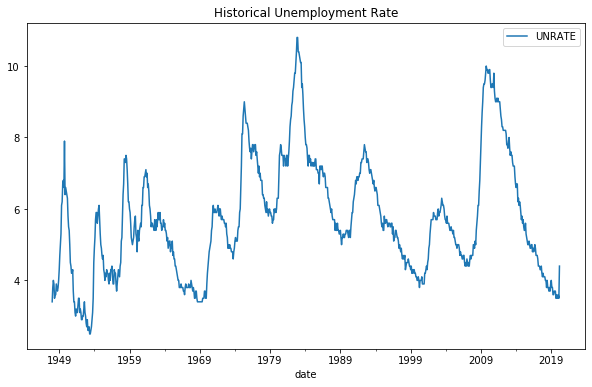

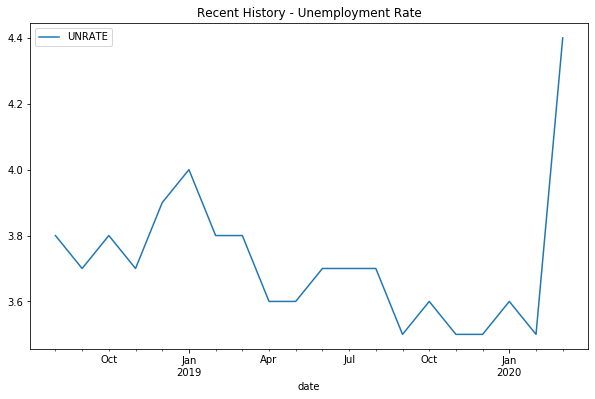

In [7]:
# Pull unemployment rate data set and visualize (https://fred.stlouisfed.org/series/UNRATE)
UN = Dataset('UNRATE', fred_API).get_data()
UN.plot(figsize=(10, 6), title='Historical Unemployment Rate')
UN.tail(20).plot(figsize=(10, 6), title='Recent History - Unemployment Rate')
UN.tail(4)

Note this is a monthly number - let's look at initial claims which are reports weekly. Initial claims are people who are newly unemployed and just filed for unemployment (as opposed to people who have been unemployed and are still looking).

,ICSA
date,
2020-02-29,0.217
2020-03-07,0.211
2020-03-14,0.282
2020-03-21,3.307
2020-03-28,6.867
2020-04-04,6.615
2020-04-11,5.237
2020-04-18,4.427


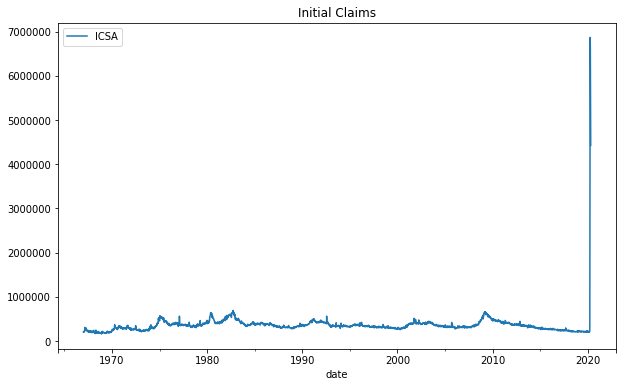

In [8]:
# pull and plot initial claims https://fred.stlouisfed.org/series/ICSA
JC = Dataset('ICSA', fred_API).get_data()
JC.plot(figsize=(10, 6), title='Initial Claims')
JC.tail(8) / 1e6  # in millions

What does this tell us about where unemployment rate for April will be?

## Inflation and Unemployment Relationship

When unemployment is low, the pool of unemployed workers subsequently decreases and companies increase wages to compete and attract a smaller talent pool. The corporate cost of wages increases as companies now have to pay higher wages so companies pass along those costs to consumers in the form of price increases. What does the cycle look like when unemployment is high?


### Phillips curve

The Phillips curve is an economic concept developed by A. W. Phillips stating that inflation and unemployment have a stable and inverse relationship. It's a simple economic model to describe the intuition above. 

<img src="https://www.economicshelp.org/wp-content/uploads/2013/02/phillips-curve.png" width="400">

### Federal Reserve Bank and Dual Mandate

Since 1977, the Federal Reserve has operated under a mandate from Congress to "promote effectively the goals of maximum employment, stable prices, and moderate long term interest rates" — what is now commonly referred to as the Fed's "dual mandate." How can the FED leverage Phillips curve to achieve this?

## Data Deep Dive

First lets pull all the data series we examined so far into a pandas dataframe.

In [9]:
data = pd.concat([PCE, UN, CPI], axis=1)
data.columns = ['PCE', 'UN', 'CPI']  # label the columns
data.head()

,PCE,UN,CPI
date,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95


Let's now visualize the historical distribution of the data to quickly to identify the gaps. As we can see below, UN and CPI are available since the 1950's, PCE since the '60s and AHE is only available since 2000's.

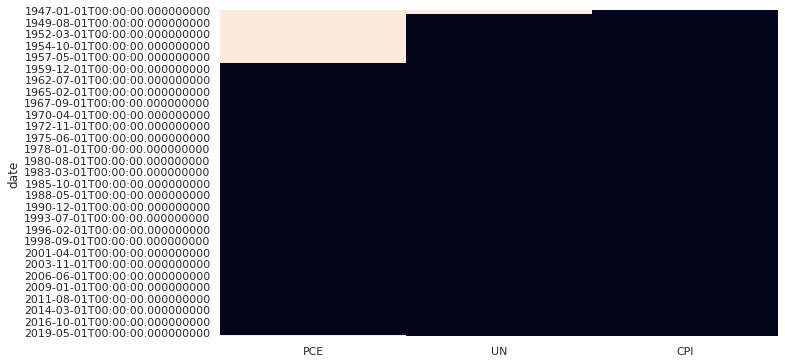

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 6)})
# visually examine where the data gaps are using a heatmap
sns.heatmap(data.isnull(), cbar=False) 

Let's focus our analysis on unemployment and PCE. Since as we saw above, these series are available for different intervals, we will drop any values that are not available. Note, in most data science work dealing with missing data and cleaning data can be a much more significant part of the process!

In [11]:
data = data[['UN', 'PCE']]  # focus on unemployment and PCE
data.dropna(inplace=True)  # remove missing values
data.head()

,UN,PCE
date,,
1959-01-01,6.0,306.1
1959-02-01,5.9,309.6
1959-03-01,5.6,312.7
1959-04-01,5.2,312.2
1959-05-01,5.1,316.1


Mind the units - PCE is a level but Phillips curve talks about rates, not levels. Let's use the returns function to transform the level to a rate.

In [12]:
from gs_quant.timeseries import returns
data['PCE_YOY'] = returns(data.PCE, 12) * 100  # 12 months in a year

/srv/app/venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Visualizing the Relationship 

Let's start by looking at the relationship through two different plots: kernel density estimation ('kde') and regression ('reg') to get a sense for where most of the data is concentrated, how it's distributed and the direction of the relationship.

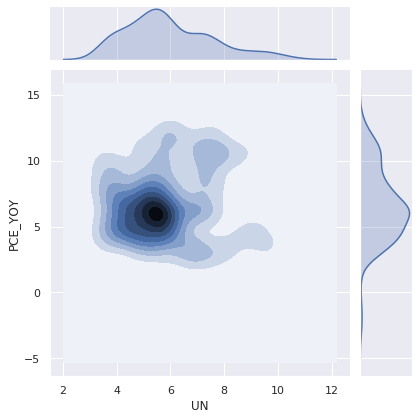

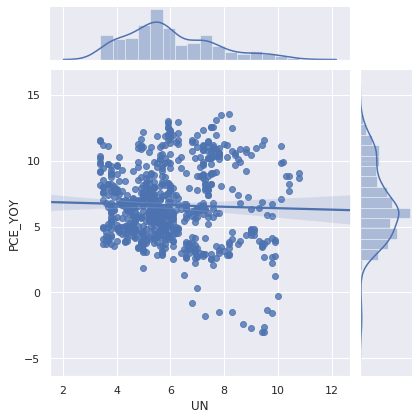

In [13]:
sns.jointplot('UN', 'PCE_YOY', data=data, kind='kde')  # kernel density estimation
sns.jointplot('UN', 'PCE_YOY', data=data, kind='reg')  # regression

Where is the Phillips curve? Let's examine the relationship in more detail by looking at each decade and the global financial crisis separately.

In [14]:
from datetime import datetime
def label_period(row):
    row_date = row.name 
    if row_date < datetime.strptime('1970-01-01', '%Y-%m-%d'):
        return '60s'
    if row_date < datetime.strptime('1980-01-01', '%Y-%m-%d'):
        return '70s'
    if row_date < datetime.strptime('1990-01-01', '%Y-%m-%d'):
        return '80s'
    if row_date < datetime.strptime('2000-01-01', '%Y-%m-%d'):
        return '90s'
    if row_date < datetime.strptime('2007-07-01', '%Y-%m-%d'):
        return '00s precrisis'
    if row_date < datetime.strptime('2009-03-01', '%Y-%m-%d'):
        return 'gfc'
    else:
        return 'recent history'

# divide data into decades, separating out global financial crisis
data['period'] = data.apply(label_period,axis=1)  

Let's now look at the scatter plot color-labeled by the periods we defined. Do any periods stand out?

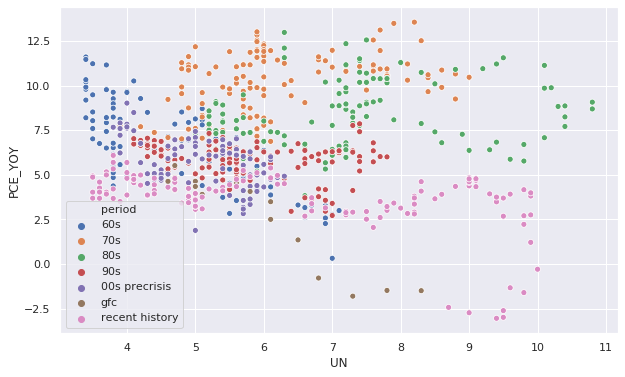

In [15]:
sns.scatterplot(x='UN', y='PCE_YOY', data=data, hue='period')  # scatter and color by period

Let's more closely examine the relationship in each defined period by looking at a linear model.

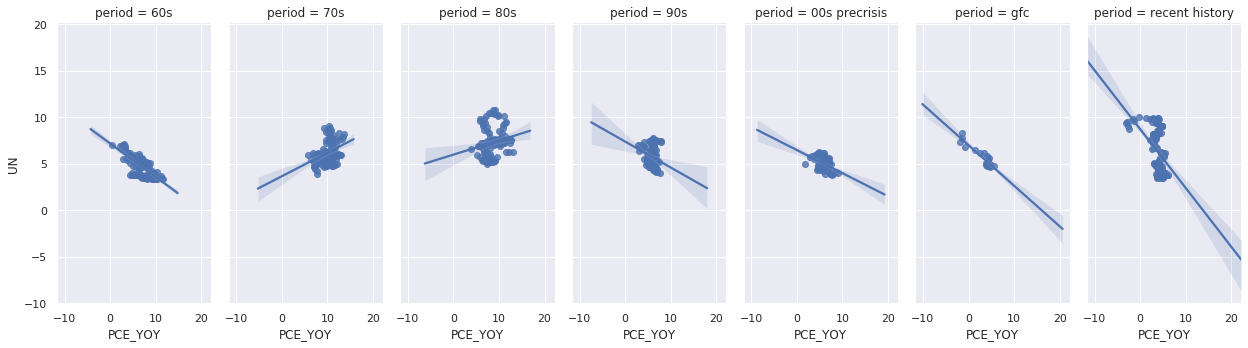

In [16]:
# look at linear models over the period
sns.lmplot(x='PCE_YOY', y='UN', col='period', data=data, aspect=.5)

### 1970s and Stagflation
Looking at the charts above, the relationship between unemployment and inflation turns positive in the 1970s contradicting the theory behind the Phillips curve! There is actually a term for what happened in the 70's: stagflation. Stagflation occurs when an economy experiences stagnant economic growth, high unemployment and high price inflation. There are many possible explanations for why this happened including a 1973 embargo that dramatically increased the price of oil, new regulations and removing the last remains of the gold standard.

### Given Historically Low Unemployment (in the recent past) Why Is Inflation So Low?

As we discussed at the beginning, some inflation is good for a healthy economy and so the question of what is causing inflation to stay low has been central to economists and central banks. Although there is no clear answer, As Peter Coy points out in [this article](https://www.bloomberg.com/news/articles/2019-04-17/did-capitalism-kill-inflation) published 4/17/19, 'Researchers are finding that low inflation is in large part a consequence of globalization or automation or deunionization—or a combination of all three—which undermine workers’ power to bargain for higher wages.'

<img src="https://www.chicagofed.org/~/media/images/research/dual-mandate/bullseye-simple-png.png" width="400">

### Given unemployment is projected to go to double digits where do we expect inflation to go? What does this mean foor holders of debt (like student loans)? What can the FED do given the dual mandate?